In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dataset=pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
print(dataset)

                                                Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]


In [46]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [47]:
dataset['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<Axes: xlabel='Liked', ylabel='count'>

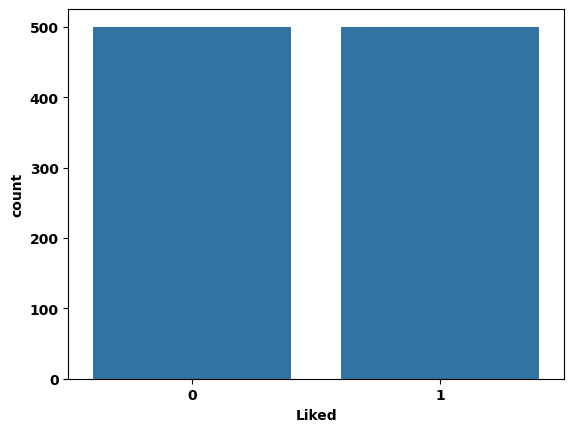

In [48]:
sns.countplot(x=dataset['Liked'])

In [49]:
dataset['Review Letter Count']=dataset['Review'].apply(len)

In [50]:
dataset

,Review,Liked,Review Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [51]:
dataset.iloc[dataset['Review Letter Count'].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

In [52]:
# import string
# string.punctuation

In [53]:
import nltk

In [54]:
from nltk.corpus import stopwords

In [55]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
sen =dataset['Review'][0]
sen

'Wow... Loved this place.'

In [58]:
import re
sen=re.sub('[^a-zA-Z]',' ',sen)
sen

'Wow    Loved this place '

In [59]:
sen=sen.split()
sen

['Wow', 'Loved', 'this', 'place']

In [60]:
temp=[]
for word in sen:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['Wow', 'Loved', 'place']

In [61]:
sen = ' '.join(temp)
sen

'Wow Loved place'

In [62]:
from nltk.stem import PorterStemmer

In [63]:
ps=PorterStemmer()
sen= ps.stem(sen)
sen

'wow loved plac'

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
cv=CountVectorizer()
cv.fit_transform(sen.split()).toarray()


array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [66]:
corpus=[]
for i in range(len(dataset)):
    sen=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    sen=sen.lower()
    sen=sen.split()
    sen=[word for word in sen if word not in stopwords.words('english')]
    sen=" ".join(sen)
    sen=ps.stem(sen)
    corpus.append(sen)
corpus

['wow loved plac',
 'crust good',
 'tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'selection menu great pric',
 'getting angry want damn pho',
 'honeslty taste fresh',
 'potatoes like rubber could tell made ahead time kept warm',
 'fries great',
 'great touch',
 'service prompt',
 'would go back',
 'cashier care ever say still ended wayyy overpr',
 'tried cape cod ravoli chicken cranberry mmmm',
 'disgusted pretty sure human hair',
 'shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'place worth time let alone vega',
 'like',
 'burrittos blah',
 'food amaz',
 'service also cut',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm sever running around like totally overwhelm',
 'worst salmon sashimi',
 'also combos like burger fries beer dec

In [67]:
# temp=[]
# for word in sen:
#     if word not in stopwords.words('english'):
#         temp.append(word)
        
# [word for word in sen if word not in stopwords.words('english')]

In [68]:
cv=CountVectorizer()
cv.fit_transform(corpus).toarray().shape 

(1000, 1994)

In [69]:
X=cv.fit_transform(corpus).toarray()


In [70]:
y=dataset['Liked']

In [71]:
from sklearn.model_selection import train_test_split 

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)


In [73]:
X_train.shape,X_test.shape

((670, 1994), (330, 1994))

In [74]:
from sklearn.naive_bayes import MultinomialNB

In [75]:
clf=MultinomialNB()

In [76]:
clf.fit(X_train,y_train)

MultinomialNB()

In [77]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [78]:
y_test.values

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,

In [79]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [80]:
print(confusion_matrix(y_test,y_pred))

[[116  57]
 [ 32 125]]


In [81]:
print(accuracy_score(y_test,y_pred))

0.7303030303030303


In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       173
           1       0.69      0.80      0.74       157

    accuracy                           0.73       330
   macro avg       0.74      0.73      0.73       330
weighted avg       0.74      0.73      0.73       330



In [83]:
import joblib

In [84]:
joblib.dump(clf,'restaurant.pkl')

['restaurant.pkl']

In [85]:
def preprocess(sen):
    corpus=[]
    # for i in range(len(dataset)):
    sen=re.sub('[^a-zA-Z]',' ',dataset['Review'][i])
    sen=sen.lower()
    sen=sen.split()
    sen=[word for word in sen if word not in stopwords.words('english')]
    sen=" ".join(sen)
    sen=ps.stem(sen)
    corpus.append(sen)
    cv=CountVectorizer()
    X=cv.fit_transform(corpus).toarray()
    print(X)


In [86]:
# my_sen=preprocess(' i loved the food very much ')
# my_sen

In [87]:
# y_pred=clf.predict(my_sen)
# print(y_pred)

In [89]:
# loaded=joblib.load(clf,'restaurant.pkl')
# Y=loaded.predict(my_sen)
# print(Y)